Import required library

In [1]:
import csv
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')  
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Download the Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/ibm dataset

/content/gdrive/MyDrive/ibm dataset


In [4]:
%ls

flowers/             flowersPredictor.h1/   spam.csv
Flowers-Dataset.zip  flowersPredictorI.m5/


Read dataset and do pre-processing

In [7]:
dataset=pd.read_csv("spam.csv",encoding = "ISO-8859-1")
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''
training_portion = .8

In [9]:
articles = []
labels = []

with open("spam.csv", 'r', encoding = "ISO-8859-1") as dataset:
    reader = csv.reader(dataset, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))


5572
5572


In [10]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

4457
4457
4457
1115
1115


In [11]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'': 1,
 'i': 2,
 'u': 3,
 'call': 4,
 'you': 5,
 '2': 6,
 'get': 7,
 "i'm": 8,
 'ur': 9,
 'now': 10}

In [12]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[8, 190, 37, 201, 30, 260, 293, 991, 222, 53, 153, 3815, 423, 46]


In [13]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

16
200
6
200
14
200


In [14]:
train_padded[10]

array([   8,  190,   37,  201,   30,  260,  293,  991,  222,   53,  153,
       3815,  423,   46,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [15]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

len(validation_sequences)
validation_padded.shape

(1115, 200)

In [16]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
training_label_seq[0]
training_label_seq[1]
training_label_seq[2]
training_label_seq.shape

validation_label_seq[0]
validation_label_seq[1]
validation_label_seq[2]
validation_label_seq.shape

(1115, 1)

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index


{1: '',
 2: 'i',
 3: 'u',
 4: 'call',
 5: 'you',
 6: '2',
 7: 'get',
 8: "i'm",
 9: 'ur',
 10: 'now',
 11: 'gt',
 12: 'lt',
 13: '4',
 14: 'ok',
 15: 'free',
 16: 'go',
 17: 'know',
 18: 'me',
 19: 'like',
 20: 'good',
 21: 'no',
 22: 'it',
 23: 'got',
 24: 'come',
 25: 'day',
 26: 'love',
 27: 'time',
 28: 'send',
 29: 'text',
 30: 'want',
 31: 'how',
 32: 'going',
 33: "i'll",
 34: 'txt',
 35: 'do',
 36: 'one',
 37: 'home',
 38: 'sorry',
 39: 'need',
 40: 'so',
 41: 'r',
 42: 'but',
 43: 'still',
 44: 'lor',
 45: 'n',
 46: 'today',
 47: 'reply',
 48: 'back',
 49: 'dont',
 50: 'if',
 51: 'see',
 52: 'stop',
 53: 'k',
 54: 'da',
 55: 'please',
 56: 'hi',
 57: 'take',
 58: 'tell',
 59: 'new',
 60: 'think',
 61: 'what',
 62: 'just',
 63: 'mobile',
 64: 'the',
 65: 'we',
 66: 'later',
 67: 'my',
 68: 'dear',
 69: 'pls',
 70: 'phone',
 71: '1',
 72: 'ì',
 73: 'your',
 74: 'week',
 75: 'msg',
 76: 'well',
 77: 'much',
 78: 'and',
 79: 'is',
 80: 'night',
 81: 'hope',
 82: 'happy',
 83: 'thi

In [19]:
def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

i'm gonna home soon want talk stuff anymore tonight k i've cried enough today ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
I'm gonna home soon want talk stuff anymore tonight, k? I've cried enough today.


Create Model

In [20]:
model = tf.keras.Sequential([
   
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [21]:
set(labels)

{'ham', 'spam'}

Compile and Build the Model

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
140/140 - 12s - loss: 0.2925 - accuracy: 0.9318 - val_loss: 0.0479 - val_accuracy: 0.9874 - 12s/epoch - 86ms/step
Epoch 2/10
140/140 - 3s - loss: 0.0283 - accuracy: 0.9924 - val_loss: 0.0349 - val_accuracy: 0.9910 - 3s/epoch - 22ms/step
Epoch 3/10
140/140 - 2s - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0383 - val_accuracy: 0.9901 - 2s/epoch - 16ms/step
Epoch 4/10
140/140 - 2s - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0422 - val_accuracy: 0.9901 - 2s/epoch - 16ms/step
Epoch 5/10
140/140 - 2s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0548 - val_accuracy: 0.9910 - 2s/epoch - 16ms/step
Epoch 6/10
140/140 - 2s - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0523 - val_accuracy: 0.9919 - 2s/epoch - 16ms/step
Epoch 7/10
140/140 - 2s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0579 - val_accuracy: 0.9919 - 2s/epoch - 16ms/step
Epoch 8/10
140/140 - 2s - loss: 7.5558e-04 - accuracy: 0.9998 - val_loss: 0.0602 - val_accuracy: 0.9919 - 2s/epoch - 16ms/step
Epoch 9/10

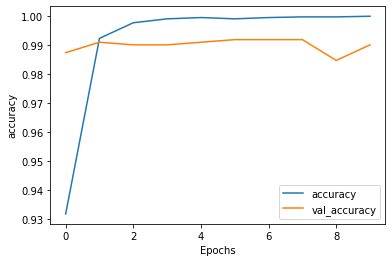

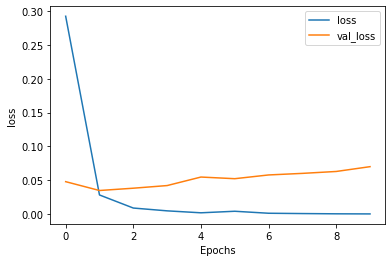

In [23]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Save the Model

In [24]:
model.save("spamorham.h1")

In [25]:
model.save("spamorham.m5")

Test the Model

In [26]:
from tensorflow.keras.models import load_model

import numpy as np

In [27]:
model = load_model("/content/gdrive/MyDrive/ibm dataset/spamorham.h1")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [32]:
train_padded[7]

array([ 210,  171, 1091, 1949, 1950, 1631, 1951, 1952, 1953,  721,  532,
        847, 1408,  778,  441,  990,  188,  847,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [41]:
training_label_seq[7]

array([1])

It is a spam!!

Lets See it predicts correct or not?

In [42]:
model.predict(train_padded[7:8])

1/1 [==============================] - 0s 100ms/step


array([[6.7082840e-07, 9.9998832e-01, 9.7820175e-06, 6.7633550e-07,
        1.3210050e-07, 3.6955976e-07]], dtype=float32)

It Predicts its a Spam!!